#### Notebook config

In [43]:
# %load ~/software/fullwavepy/fullwavepy/config/jupyter.py
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(ERROR) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


Suppress printing logs except warnings and errors:

In [44]:
lll(40)

Set the path for projects accessible by the computational cluster:

In [45]:
path_eph = '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano'

Load the experiment's metadata:

In [46]:
xp = PROTEUS()

##### Test the `fullwavepy.fwi` package

In [13]:
# !python3 -m unittest fullwavepy.fwi.test  -v

## Pre-requisites

### Model box

In [47]:
xp = PROTEUS()
b01 = xp.box['kol1']
box = b01.box
box

[8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0]

### Numerical solver

In [48]:
exe = { 
    'fullwave':  '~/PhD/fullwave3D/rev690/bin/fullwave3D.exe',
    'segyprep':  '/home/kmc3817/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16' }   

### Discretisation

3000 time samples is more than enough to capture the arrivals at all offsets, even for 2-sec time-window

In [49]:
dt = 0.0025 # seconds
ns = 3000   # samples
dx = 50     # metres

### Source wavelet

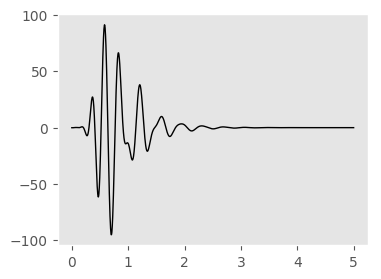

In [66]:
xp.wvl.plot(aspect='auto') # fixme labels
wvl = xp.wvl.arr.arr

### Starting model

In [29]:
svp = xp.svp.arr.extract(b01.extent)
# svp.plot(0,0,0, unit='i') # fixme units, add bt

Subset of field data to simulate

In [57]:
%%time 
data_path = '/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords/'
obs_hy = DataSet(data_path, io='proteus_hy')
ds = obs_hy.extract(b01.xy, path='./', name='obs_hy_b01')

 mkdir: cannot create directory ‘.//obs_hy_b01’: File exists

CPU times: user 28 ms, sys: 76 ms, total: 104 ms
Wall time: 27.8 s


# Init

In [53]:
# init project 
path = path_eph
# path = './'
env = {'SLAVES_WAVEFIELDSVTR': -100} # take a wavefield snapshot every 100 time steps
kwargs = dict(path=path, exe=exe, box=box, dt=dt, ns=ns, dx=dx, env=env, cat=0)
s01 = ProjSyn('method_s01', **kwargs)

# Inp

Prepare input:

In [78]:
%%time 
syn.i.tvp.prep(svp)
syn.i.rsg.prep(wvl)
syn.i.rse.prep(fnames=['../../%s' % i for i in ds.fnames])
syn.i.sp.prep(reciprocity=True, ztype='d')

Content of  .//method_s01//inp/method_s01-RawSeis.txt : 
../.././/obs_hy_b01/MGL1521_S104_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S109_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S112_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S124_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S125_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S137_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S157_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S158_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S177_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_S178_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_W105_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_W110_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_W123_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_W138_4_x8000_25000_y-3000_15000.sgy
../.././/obs_hy_b01/MGL1521_W139_4_x8000_25000_

Pre-process the input:

In [51]:
syn.i.sp.run()
syn.i.rnf.prep(b_abs=40, e_abs=50)


 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to method_s01
 Preparing files for synthetics...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       no
 Use FFID instead of SOURCE numbers:     yes
 FFID numbers are uniqu

ValueError: 
 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to method_s01
 Preparing files for synthetics...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       no
 Use FFID instead of SOURCE numbers:     yes
 FFID numbers are unique:                yes
 Renumber original FFID numbers:          no
 Use composite shots:                     no
 Apply source-receiver reciprocity:      yes

 Reading multiple SEG-Y datafiles...
 Reading: ../.././/obs_hy_b01/MGL1521_S104_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S109_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S112_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S124_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S125_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S137_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S157_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S158_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S177_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_S178_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_W105_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_W110_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_W123_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_W138_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_W139_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0
 Reading: ../.././/obs_hy_b01/MGL1521_W176_4_x8000_25000_y-3000_15000.sgy
 Unable to decode SEG-Y headers
 Traces read from file:                    0

 Total traces used:                        0
 Reciprocal sources in model:              0
 Reciprocal receivers in model:            0
 Maximum receivers per source:             1

 Reading source signatures...

 Checking models...

 Cannot open SGY file
 Cannot open SGY file
 Found model file method_s01-TrueVp.sgy
 Vertical grid points in file:            81
 Expecting:                               81
 Profiles in file:                    123101
 Expecting:                           123101
 Maximum velocity (m/s):              6515.1
 Minimum velocity (m/s):              1517.4
 For high kernel:
 Maximum allowable (m/s):            13187.0
 High kernel OK below (Hz):              9.0
 For low kernel:
 Maximum allowable (m/s):             9900.0
 Low kernel OK below (Hz):               4.9

 There was nothing to plot

Errors raised: 
 Unable to decode SEG-Y headers

# Run

Two nodes calculate 3000 time samples in exactly 1 hour.

In [52]:
syn.i.rsync('my_eph') 
syn.i.pbs.no[0].prep(q='debug')
syn.i.pbs.no[1].prep(select=2, q='pqmrwarn') # it took exactly an hour!!!
syn.i.rsync('my_eph') 

OSError: /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano/method_s01//inp/method_s01-JobInfo0.log already exists!

On the `cx1` PBS cluster, first **set environment** vars:

In [71]:
# dir=my_ephemeral/PROJECTS/ch08_Kolumbo_volcano; code=rev690; proj=method_syn01; q=pqmrwarn

and then **submit** the job(s):

In [72]:
# dir=$dir; code=$code; q=$q; projs=$(ls $dir | grep $proj);
# for proj in $projs; do echo $proj; fwi_qsub.sh $dir/$proj/ $proj $code $q; donea

### Logs

In [21]:
no = 1
syn.o.o.no[no].cat()
# syn.o.je.no[no].cat()
# syn.o.jo.no[no].cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano/method_s01//out/method_s01-Out1.log : 
# mpiexec: No RDMA network found -- using sockets+shared memory (I_MPI_DEVICE=ssm)
# mpiexec: full path to program is /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
# mpiexec: program arguments are: method_s01 -1 40
# mpiexec: 2 ranks allocated via PBS select
# mpiexec: 40 OpenMP threads / rank allocated by PBS select
# mpiexec: Job has shared use of the allocated nodes. Disabling process-pinning
# mpiexec: machinefile configured as:
cx1-104-11-1.cx1.hpc.ic.ac.uk:1
cx1-104-11-4.cx1.hpc.ic.ac.uk:1
#
# mpiexec: Checking all nodes are ONLINE:
# mpiexec: All nodes appear ONLINE
# mpiexec: launch started at Wed  3 Nov 14:37:35 GMT 2021
# mpiexec: launching program...
# /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe method_s01 -1 40
(cx1-104-11-1.cx1.hpc.ic.ac.uk:0)
(cx1-104-11-4.cx1.hpc.ic.ac.uk:1)
---=== Starting run (host: c

# Out

### Data

#### Fig.
Synthetics.

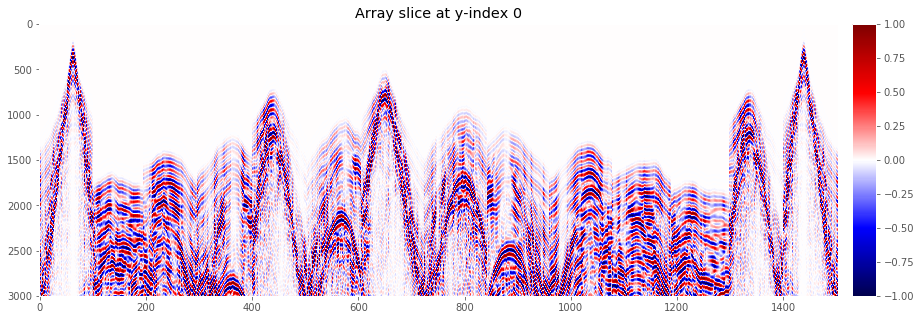

In [37]:
figure(15,5)
syn.out.syn.plot(win=dict(tracf=[4104]), norm='max')

#### Alg.
Copy the synthetics from `ephemeral` to local permanent storage. 

In [31]:
!cp {syn.o.syn.fname} ./method_s01/out/

#### Tab.
Synthetics header.

In [33]:
syn.o.syn.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00847586 s, 378 kB/s

24080 traces:
tracl    3555 13370 (3555 - 13370)
tracr    2 1506 (2 - 1506)
fldr     17567 42821 (17567 - 42821)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
trid     1
offset   10 21208 (10473 - 19597)
gelev    196 456 (417 - 410)
selev    -12
sdepth   12
swdep    45 503 (395 - 393)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8201 - 8128)
sy       -2126 13847 (13742 - 13727)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    17
delrt    0 5 (0 - 4)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (4 - 18)
sec      0 59 (55 - 43)
timbas   0 1000 (435 - 737)

Shot coordinate limits:
	North(23852,13847) South(10038,-2126) East(24996,656) West(8051,11996)

Receiver coordinate limits:
	North(1867

### Wavefield

In [165]:
tvp = Arr3d(s01.i.tvp.read(), extent=s01.i.tvp.extent)

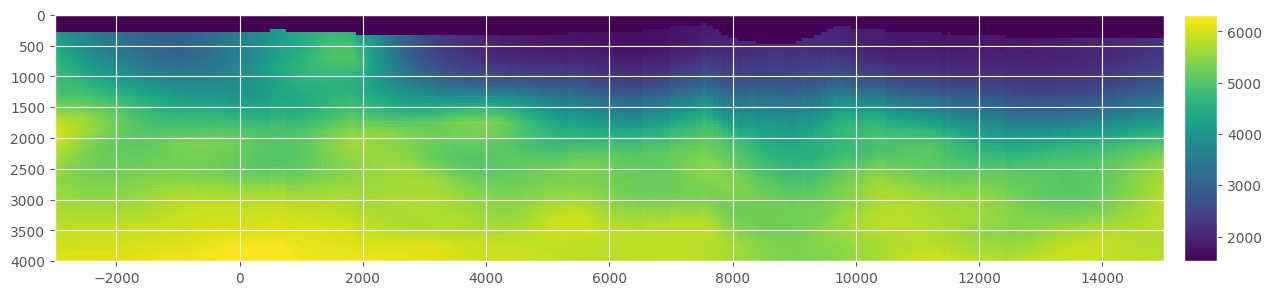

In [167]:
figure(15,5)
i = 0
tvp.slice(13.25e3, axis=0, unit='m')
tvp.slices.list[0].plot()

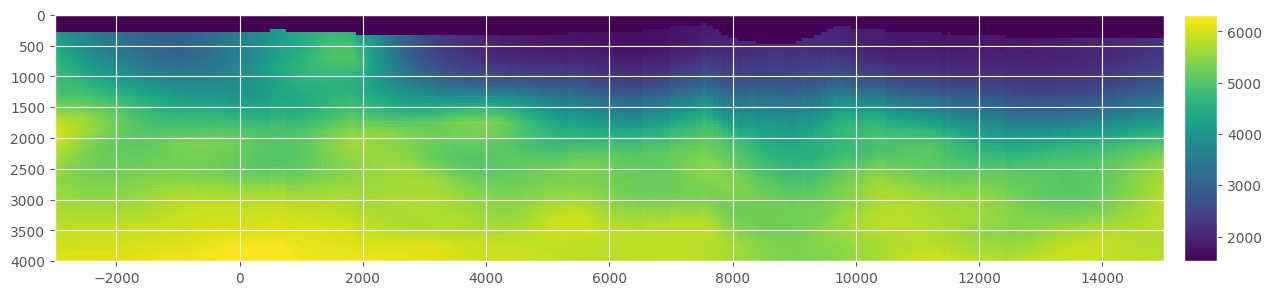

In [142]:
figure(15,5)
tvp.slice(13.25e3, axis=0, unit='m')
tvp.slices.list[0].plot()

In [137]:
tvp.slices.list[0].axes

AttributeError: 'Arr3dSliceX' object has no attribute 'axes'

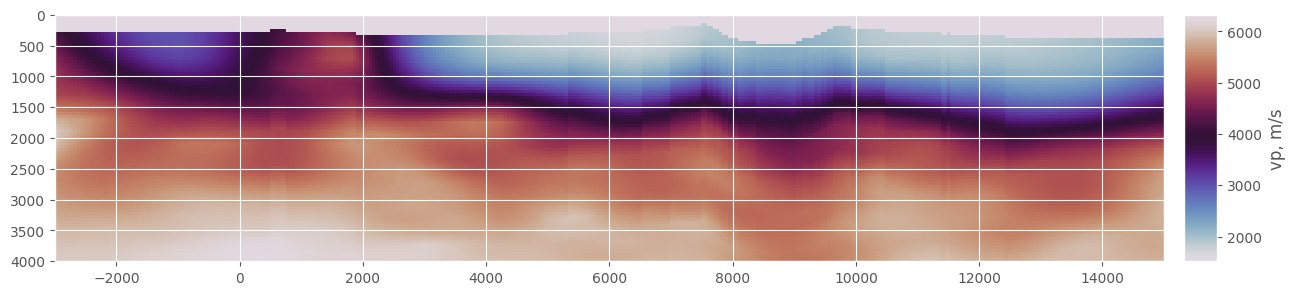

In [127]:
from arrau.a3d import Arr2d, Arr3d
class Vp:
    pass
class Mod:
    def __init__(self, param='vp', unit='m/s', srcs=None, recs=None,
                 arr=None, bt=None, fs=None, fw=None, bw=None):
        self.param = param
        self.unit = 'm/s'
        self._init_param(param)
        self.arr = arr
        self.bt = bt
        self.fw = fw
        self.srcs = srcs
        self.recs = recs
        self._set_objs()
    def plot(self, *args, **kwargs):
        kwargs['cmap'] = kwargs.get('cmap', 'twilight')
        self.arr.plot(*args, **kwargs)
    def read(self, file_object, attr='arr', **kwargs):
        setattr(self, attr, file_object.read(**kwargs))
    def set(self, arr, attr='arr'):
        setattr(self, attr, arr)
        self._set_objs()
    def slice(self, *args, **kwargs):
        for obj in self.objs:
            if obj is not None:
                obj.slice(*args, **kwargs)
    def plot(self, *args, **kwargs):
        self.slice(*args, **kwargs)
        i = 0
        kwargs['cmap'] = kwargs.get('cmap', 'twilight')
        kwargs['label'] = kwargs.get('label', '%s, %s' % (self.param, self.unit))
        self.arr.slices.list[i].plot(**kwargs)
        self.arr.slices.list[i].plot_slice_lines()
        for obj in self.objs[1:]: # skip arr
            if obj is not None:
                obj.slices.list[i].plot(**kwargs)        
    def _init_param(self, param):
        if param == 'vp':
            self.param = Vp()
        else:
            raise ValueError()
    def _set_objs(self):
        # the order matters for plots
        self.objs = [self.arr]# , self.fs, self.fw, self.bw, srcs, recs]
    def _slice3(self):
        pass
m = Mod()
m.set(tvp)
# m.slice(13.25e3, axis=0, unit='m')
# m.arr.slices.list[0].value
figure(15,5)
m.plot(13.25e3, axis=0, unit='m', label='vp, m/s')

#### Alg.
Test `fullwavepy.seismic.fields`

In [91]:
# !python3 -m unittest fullwavepy.seismic.test.test_wavefields -v

# ...